In [1]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data,wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth',200)

In [2]:
## get spy data from 2014-01-01 to 2019-03-01
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2019-03-01')

spy = pdr.data.get_data_yahoo('SPY',start_date,end_date)

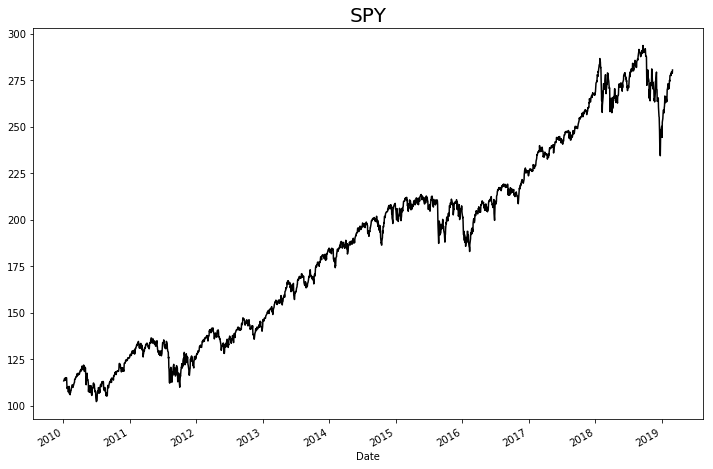

In [3]:
## get close data of spy
spy_c = spy['Close']
fig, ax = plt.subplots(figsize=(12,8))
spy_c.plot(color='k')
plt.title('SPY',fontsize=20)

In [4]:
## view the first and last spy data
first_open = spy['Open'].iloc[0]
print('first day open price: %.2f'%(first_open))
last_close = spy['Close'].iloc[-1]
print('last day close price: %.2f'%(last_close))
print('price difference through the period: %.2f'%(last_close-first_open))

first day open price: 112.37
last day close price: 280.42
price difference through the period: 168.05


In [5]:
## calculate daily change between open and close
spy['Daily_change'] = spy['Close']-spy['Open']
spy['Daily_change'].head(5)

Date
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
2010-01-08    0.680001
Name: Daily_change, dtype: float64

In [6]:
spy['Overnight_change'] = spy['Open']-spy['Close'].shift(1)
spy['Overnight_change'].head(5)

Date
2010-01-04         NaN
2010-01-05   -0.070000
2010-01-06   -0.110000
2010-01-07   -0.209999
2010-01-08   -0.300003
Name: Overnight_change, dtype: float64

In [7]:
## compare daytime and overnight volatility
v1 = np.std(spy['Daily_change'])
v2 = np.std(spy['Overnight_change'])
print('The volatility of Daily change is: %.2f'%(v1))
print('The volatility of Overnight change is: %.2f'%(v2))
if v1>v2:
    print('Overnight transaction has a lower volatility')
else:
    print('Daytime transaction has a lower volatility')

The volatility of Daily change is: 1.37
The volatility of Overnight change is: 0.97
Overnight transaction has a lower volatility


In [8]:
## compare daytime and overnight change when spy decreases
c1 = spy[spy['Daily_change']<0]['Daily_change'].mean()
c2 = spy[spy['Overnight_change']<0]['Overnight_change'].mean()
print('The average change of Daily is: %.2f'%(c1))
print('The average change of Overnight is: %.2f'%(c2))
if c1>c2:
    print('Overnight transaction has a larger decrease')
else:
    print('Daytime transaction has a larger decrease')

The average change of Daily is: -1.00
The average change of Overnight is: -0.69
Daytime transaction has a larger decrease


In [9]:
## calculate three stratrgies' return metrics
daily_rtn = spy['Close'].pct_change()*100
id_rtn = (spy['Close']-spy['Open'])/spy['Open']*100
on_rtn = (spy['Open']-spy['Close'].shift(1))/spy['Close'].shift(1)*100

In [10]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(),3)
    mean_l = round(s[s<0].mean(),3)
    win_r = round(wins/losses,3)
    mean_trd = round(s.mean(),3)
    sd = round(np.std(s),3)
    max_l = round(s.min(),3)
    max_w = round(s.max(),3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n),4)
    cnt = len(s)
    print('Trades: %i'%(cnt),\
          '\nWins: %i'%(wins),\
          '\nLosses: %i'%(losses),\
          '\nBreakeven: %i'%(evens),\
          '\nWin/Loss Ratio: %.3f'%(win_r),\
          '\nAverage Win: %.3f'%(mean_w),\
          '\nAverage Loss: %.3f'%(mean_l),\
          '\nMean: %.3f'%(mean_trd),\
          '\nStd Dev: %.3f'%(sd),\
          '\nMax Loss: %.3f'%(max_l),\
          '\nMax Win: %.3f'%(max_w),\
          '\nSharpe Ratio: %.3f'%(sharpe_r))

In [11]:
get_stats(daily_rtn)

Trades: 2304 
Wins: 1264 
Losses: 1030 
Breakeven: 10 
Win/Loss Ratio: 1.227 
Average Win: 0.632 
Average Loss: -0.677 
Mean: 0.044 
Std Dev: 0.942 
Max Loss: -6.512 
Max Win: 5.052 
Sharpe Ratio: 0.737


In [12]:
get_stats(id_rtn)

Trades: 2305 
Wins: 1255 
Losses: 1032 
Breakeven: 18 
Win/Loss Ratio: 1.216 
Average Win: 0.484 
Average Loss: -0.549 
Mean: 0.018 
Std Dev: 0.737 
Max Loss: -4.196 
Max Win: 4.327 
Sharpe Ratio: 0.385


In [13]:
get_stats(on_rtn)

Trades: 2304 
Wins: 1232 
Losses: 1035 
Breakeven: 37 
Win/Loss Ratio: 1.190 
Average Win: 0.381 
Average Loss: -0.395 
Mean: 0.026 
Std Dev: 0.560 
Max Loss: -3.406 
Max Win: 4.090 
Sharpe Ratio: 0.740


In [14]:
## building machine learning models
## calculate last 20 days close as variables
sp20 = pd.DataFrame(spy['Close'],columns=['Close'])
for i in range(1,21,1):
    sp20.loc[:,'Close Minus'+str(i)] = sp20['Close'].shift(i)
sp20 = sp20.iloc[20:,::-1]
sp20.head(5)

,Close Minus20,Close Minus19,Close Minus18,Close Minus17,Close Minus16,Close Minus15,Close Minus14,Close Minus13,Close Minus12,Close Minus11,...,Close Minus9,Close Minus8,Close Minus7,Close Minus6,Close Minus5,Close Minus4,Close Minus3,Close Minus2,Close Minus1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,113.330002,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,...,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997
2010-02-03,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,...,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002
2010-02-04,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,...,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002
2010-02-05,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,...,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004
2010-02-08,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,...,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999


In [15]:
## split train test set
x_train = sp20[:-500]
y_train = sp20['Close'].shift(-1)[:-500]
x_test = sp20[-500:]
y_test = sp20['Close'].shift(-1)[-500:]

In [16]:
## fit svr model
from sklearn.svm import SVR
clf = SVR(kernel='linear')
model = clf.fit(x_train,y_train)
preds = model.predict(x_test)

In [17]:
## measure model performance
tf = pd.DataFrame(list(zip(y_test,preds)),columns=['Next Day Close','Predicted Next Close'],index = y_test.index)
tf.head(20)

,Next Day Close,Predicted Next Close
Date,,
2017-03-07,236.559998,236.764200
2017-03-08,236.860001,236.488750
2017-03-09,237.690002,236.779217
2017-03-10,237.809998,237.700436
2017-03-13,236.899994,237.832426
2017-03-14,238.949997,236.992405
2017-03-15,238.479996,239.022443
2017-03-16,237.029999,238.372992
2017-03-17,236.770004,237.170436


In [18]:
## measure model performance
## first add close and open to tf
cdc = spy[['Close']].iloc[-500:]
cdc.columns = ['Current Day Close']
ndo = spy[['Open']].iloc[-500:].shift(-1)
ndo.columns = ['Next Day Open']
tf1 = pd.merge(tf,cdc,left_index=True,right_index=True)
tf2 = pd.merge(tf1,ndo,left_index=True,right_index=True)
tf2.head(10)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2017-03-07,236.559998,236.764200,237.000000,237.339996
2017-03-08,236.860001,236.488750,236.559998,236.699997
2017-03-09,237.690002,236.779217,236.860001,237.970001
2017-03-10,237.809998,237.700436,237.690002,237.619995
2017-03-13,236.899994,237.832426,237.809998,237.179993
2017-03-14,238.949997,236.992405,236.899994,237.559998
2017-03-15,238.479996,239.022443,238.949997,239.110001
2017-03-16,237.029999,238.372992,238.479996,237.750000
2017-03-17,236.770004,237.170436,237.029999,237.029999


In [19]:
## define funcitons to get trading signals and return
## if pred>true for close, we buy in at open and sell at close
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open']+2.5:
        return 1
    else:
        return 0
def get_ret(r):
    if r['Signal']==1:
        return ((r['Next Day Close']-r['Next Day Open'])/r['Next Day Open'])*100
    else:
        return 0

In [20]:
tf2['Signal'] = tf2.apply(get_signal,axis=1)
tf2['PnL'] = tf2.apply(get_ret,axis=1)
tf2.head(10)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2017-03-07,236.559998,236.764200,237.000000,237.339996,0,0.0
2017-03-08,236.860001,236.488750,236.559998,236.699997,0,0.0
2017-03-09,237.690002,236.779217,236.860001,237.970001,0,0.0
2017-03-10,237.809998,237.700436,237.690002,237.619995,0,0.0
2017-03-13,236.899994,237.832426,237.809998,237.179993,0,0.0
2017-03-14,238.949997,236.992405,236.899994,237.559998,0,0.0
2017-03-15,238.479996,239.022443,238.949997,239.110001,0,0.0
2017-03-16,237.029999,238.372992,238.479996,237.750000,0,0.0
2017-03-17,236.770004,237.170436,237.029999,237.029999,0,0.0


In [21]:
## compare the strategy with in day trade
get_stats((spy['Close'].iloc[-500:]-spy['Open'].iloc[-500:])*100/spy['Open'].iloc[-500:])

Trades: 500 
Wins: 258 
Losses: 236 
Breakeven: 6 
Win/Loss Ratio: 1.093 
Average Win: 0.439 
Average Loss: -0.503 
Mean: -0.011 
Std Dev: 0.750 
Max Loss: -3.873 
Max Win: 4.327 
Sharpe Ratio: -0.235


In [22]:
# our strategy
get_stats(tf2['PnL'])

Trades: 500 
Wins: 10 
Losses: 5 
Breakeven: 485 
Win/Loss Ratio: 2.000 
Average Win: 1.548 
Average Loss: -0.925 
Mean: 0.022 
Std Dev: 0.278 
Max Loss: -1.583 
Max Win: 3.535 
Sharpe Ratio: 1.238


In [23]:
## we can conclude that our strategy is a positive signal

In [33]:
## Finally we are gonna build models on dynamic time intervals
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def dtw_dist(x,y):
    # this function returns the euclidean distance between two arrays
    distance, path = fastdtw(x,y,dist=euclidean)
    return distance

In [36]:
## Then we are going to cut our time interval into periods of len 5
tseries = []
tlen = 5
for i in range(tlen,len(spy),tlen):
    pctc = spy['Close'].iloc[i-tlen:i].pct_change()[1:].values*100
    res = spy['Close'].iloc[i-tlen:i+1].pct_change()[-1]*100
    tseries.append((pctc,res))

In [39]:
# compute distances between pairs in tseries
dist_pair = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0],tseries[j][0])
        dist_pair.append((i,j,dist,tseries[i][1],tseries[j][1]))

In [41]:
dist_frame = pd.DataFrame(dist_pair,columns=['A','B','Dist','A Ret','B Ret'])
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]
winf.head(5)

,A,B,Dist,A Ret,B Ret
37,0,38,0.841530,0.139655,0.308616
48,0,49,0.978540,0.139655,-0.158829
52,0,53,0.441192,0.139655,-1.746291
55,0,56,0.652839,0.139655,0.208565
106,0,107,0.546606,0.139655,0.219562


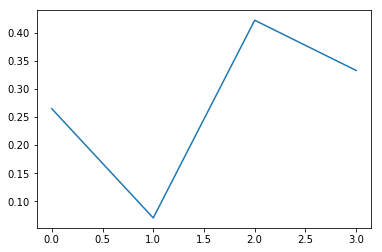

In [42]:
plt.plot(np.arange(4),tseries[0][0])

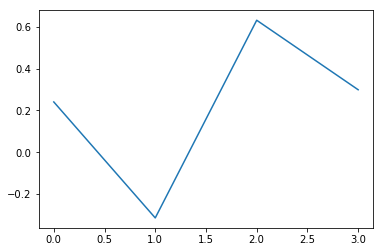

In [44]:
plt.plot(np.arange(4),tseries[56][0])

In [45]:
## We can see that they are almost the same
## So our next strategy will be to find all those that can benefit on next day, if we find the curve similar to
## this pattern, we will buy in.

In [57]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})
#            print(excluded)
winf.apply(get_returns,axis=1)
#print(return_list)

37        None
48        None
52        None
55        None
106       None
107       None
119       None
134       None
137       None
146       None
152       None
155       None
158       None
167       None
195       None
199       None
207       None
220       None
221       None
224       None
231       None
232       None
243       None
244       None
245       None
249       None
257       None
263       None
265       None
269       None
          ... 
184487    None
184490    None
184492    None
184494    None
184938    None
184954    None
184976    None
185381    None
185396    None
185403    None
185408    None
185410    None
185887    None
186314    None
186321    None
186326    None
186328    None
186329    None
190007    None
191381    None
192301    None
194137    None
194154    None
194587    None
195501    None
195510    None
196424    None
196426    None
198261    None
201041    None
Length: 2500, dtype: object

In [54]:
get_stats(pd.Series(return_list))

Trades: 410 
Wins: 261 
Losses: 147 
Breakeven: 2 
Win/Loss Ratio: 1.776 
Average Win: 0.489 
Average Loss: -0.532 
Mean: 0.120 
Std Dev: 0.674 
Max Loss: -3.591 
Max Win: 2.127 
Sharpe Ratio: 2.830
